# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's import keras and load MNIST dataset

In [0]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.backend import backend
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


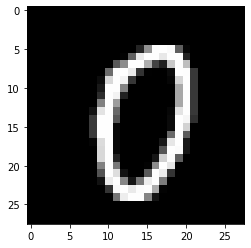

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [0]:
import numpy as np

train_filter = np.where((y_train == 0 ) | (y_train==1)| (y_train ==2)| (y_train==3) | (y_train == 4))
test_filter = np.where((y_test == 0) | (y_test ==1)|(y_test==2)|(y_test==3)|(y_test == 4))

X_train_1, y_train_1 = X_train[train_filter], y_train[train_filter]
X_test_1, y_test_1 = X_test[test_filter], y_test[test_filter]

In [0]:
#using another method to separate the data

train_mask = np.isin(y_train, [5, 9])
test_mask = np.isin(y_test, [5, 9])

X_train_2, y_train_2 = X_train[train_mask], y_train[train_mask]
X_test_2, y_test_2 = X_test[test_mask], y_test[test_mask]

## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [9]:
print(X_train_1.shape, X_test_1.shape)
print(X_train_2.shape, X_test_2.shape)
print(y_train_1.shape, y_test_1.shape)
print(y_train_2.shape, y_test_2.shape)

(30596, 28, 28) (5139, 28, 28)
(11370, 28, 28) (1901, 28, 28)
(30596,) (5139,)
(11370,) (1901,)


## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
X_train_1 = X_train_1.reshape(X_train_1.shape[0],28,28,1).astype('float32')
X_test_1 = X_test_1.reshape(X_test_1.shape[0],28,28,1).astype('float32')

In [0]:
# X_train_2 = X_train_2.reshape(X_train_2.shape[0],28,28,1).astype('float32')
# X_test_2 = X_test_2.reshape(X_test_2.shape[0],28,28,1).astype('float32')

## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
X_train_1 /= 255
X_test_1 /= 255

### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [20]:
print('The shape 1st dataset: ', X_train_1.shape)
print('The number of iamges in 1st dataset: ', len(X_train_1))
print('the number of images in 1st datset: ', len(X_test_1))

The shape 1st dataset:  (30596, 28, 28, 1)
The number of iamges in 1st dataset:  30596
the number of images in 1st datset:  5139


## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
import keras
y_train_1 = keras.utils.to_categorical(y_train_1,num_classes=5) 
y_test_1 = keras.utils.to_categorical(y_test_1,num_classes=5)

## Question 6
We will build our model by using high level Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, Convolution2D

# Define Model
model = Sequential()

# 1st Convolution layer
model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1), name='Conv_1'))
model.add(Activation('relu'))

# max-pool layer
model.add(MaxPooling2D(pool_size=(2,2), name='Max_pool'))

# dropout layer
model.add(Dropout(0.2, name='droput_1'))

## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [0]:
# Fully Connected Layer
model.add(Flatten())
model.add(Dense(128,name='dense_full_layer'))
model.add(Activation('relu'))

# Prediction Layer
model.add(Dense(5, name='dense_prediction'))
model.add(Activation('softmax'))

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [45]:
TRAIN = False
BATCH_SIZE = 128
EPOCHS = 10

# Loss and Optimizer #put metrics as f1 score
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model.fit(X_train_1, y_train_1, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(X_test_1, y_test_1), callbacks=callback_list)

Train on 30596 samples, validate on 5139 samples
Epoch 1/10
30596/30596 [==============================] - 2s 49us/step - loss: 1.5645 - acc: 0.2903 - val_loss: 1.1044 - val_acc: 0.6497
Epoch 2/10
30596/30596 [==============================] - 1s 42us/step - loss: 1.5617 - acc: 0.3555 - val_loss: 1.1848 - val_acc: 0.6375
Epoch 3/10
30596/30596 [==============================] - 1s 44us/step - loss: 1.5594 - acc: 0.3621 - val_loss: 1.2742 - val_acc: 0.6276
Epoch 4/10
30596/30596 [==============================] - 1s 42us/step - loss: 1.5569 - acc: 0.3715 - val_loss: 1.3910 - val_acc: 0.6116
Epoch 5/10
30596/30596 [==============================] - 1s 40us/step - loss: 1.5542 - acc: 0.3856 - val_loss: 1.4815 - val_acc: 0.6061
Epoch 6/10
30596/30596 [==============================] - 1s 38us/step - loss: 1.5518 - acc: 0.3817 - val_loss: 1.6237 - val_acc: 0.5954
Epoch 7/10
30596/30596 [==============================] - 1s 41us/step - loss: 1.5489 - acc: 0.3947 - val_loss: 1.7422 - val_acc:

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [46]:
score = model.evaluate(X_test_1, y_test_1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5139/5139 [==============================] - 0s 66us/step
Test loss: 2.1838722727739017
Test accuracy: 0.5648958941254316


## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [0]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

In [41]:
#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

Conv_1
False
activation_4
False
Max_pool
False
droput_1
False
flatten_2
False
dense_full_layer
True
activation_5
False
dense_prediction
True
activation_6
False


### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [0]:
y_train_remapped = y_train_2 - 5
y_test_remapped = y_test_2 - 5

y_train_2 = keras.utils.to_categorical(y_train_remapped,num_classes=5)
y_test_2 = keras.utils.to_categorical(y_test_remapped,num_classes=5)

### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
X_train_2 = X_train_2.reshape(X_train_2.shape[0],28,28,1).astype('float32')
X_test_2 = X_test_2.reshape(X_test_2.shape[0],28,28,1).astype('float32')

### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
X_train_2 /= 255
X_test_2 /= 255

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [44]:
print('The shape 2nd dataset: ', X_train_2.shape)
print('The number of iamges in 2nd dataset: ', len(X_train_2))
print('the number of images in 2nd datset: ', len(X_test_2))

The shape 2nd dataset:  (11370, 28, 28, 1)
The number of iamges in 2nd dataset:  11370
the number of images in 2nd datset:  1901


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
X_train_2 = keras.utils.to_categorical(X_train_2,num_classes=5) 
X_test_2 = keras.utils.to_categorical(X_test_2,num_classes=5)

### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [47]:
#Training on the dataset
model.fit(X_train_2, y_train_2,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test_2, y_test_2))

Train on 11370 samples, validate on 1901 samples
Epoch 1/10
11370/11370 [==============================] - 1s 46us/step - loss: 0.2362 - acc: 0.9272 - val_loss: 0.1076 - val_acc: 0.9663
Epoch 2/10
11370/11370 [==============================] - 0s 40us/step - loss: 0.0950 - acc: 0.9713 - val_loss: 0.0783 - val_acc: 0.9753
Epoch 3/10
11370/11370 [==============================] - 0s 42us/step - loss: 0.0725 - acc: 0.9783 - val_loss: 0.0627 - val_acc: 0.9800
Epoch 4/10
11370/11370 [==============================] - 1s 45us/step - loss: 0.0639 - acc: 0.9804 - val_loss: 0.0553 - val_acc: 0.9826
Epoch 5/10
11370/11370 [==============================] - 0s 39us/step - loss: 0.0581 - acc: 0.9813 - val_loss: 0.0501 - val_acc: 0.9842
Epoch 6/10
11370/11370 [==============================] - 0s 39us/step - loss: 0.0545 - acc: 0.9832 - val_loss: 0.0470 - val_acc: 0.9853
Epoch 7/10
11370/11370 [==============================] - 0s 37us/step - loss: 0.0512 - acc: 0.9837 - val_loss: 0.0443 - val_acc:

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [48]:
score = model.evaluate(X_test_2, y_test_2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1901/1901 [==============================] - 0s 82us/step
Test loss: 0.03773833397993409
Test accuracy: 0.9879011046817464


In [0]:
## Compiling again with Adam optimier
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.0001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [51]:
#Training on the dataset
model.fit(X_train_2, y_train_2,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test_2, y_test_2))

Train on 11370 samples, validate on 1901 samples
Epoch 1/10
11370/11370 [==============================] - 0s 41us/step - loss: 0.0031 - acc: 0.9991 - val_loss: 0.0094 - val_acc: 0.9968
Epoch 2/10
11370/11370 [==============================] - 1s 44us/step - loss: 0.0025 - acc: 0.9993 - val_loss: 0.0101 - val_acc: 0.9958
Epoch 3/10
11370/11370 [==============================] - 0s 43us/step - loss: 0.0029 - acc: 0.9993 - val_loss: 0.0091 - val_acc: 0.9958
Epoch 4/10
11370/11370 [==============================] - 0s 43us/step - loss: 0.0022 - acc: 0.9998 - val_loss: 0.0090 - val_acc: 0.9968
Epoch 5/10
11370/11370 [==============================] - 1s 49us/step - loss: 0.0023 - acc: 0.9996 - val_loss: 0.0097 - val_acc: 0.9958
Epoch 6/10
11370/11370 [==============================] - 1s 49us/step - loss: 0.0023 - acc: 0.9996 - val_loss: 0.0089 - val_acc: 0.9963
Epoch 7/10
11370/11370 [==============================] - 1s 47us/step - loss: 0.0024 - acc: 0.9996 - val_loss: 0.0103 - val_acc:

In [52]:
# Accuracy
score = model.evaluate(X_test_2, y_test_2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1901/1901 [==============================] - 0s 76us/step
Test loss: 0.009834361057891807
Test accuracy: 0.9957916885849553


-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [4]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
dfTweets = pd.read_csv('/content/drive/My Drive/Colab Notebooks/tweets.csv', encoding = 'ISO-8859-1')

### Drop null values
- drop all the rows with null values

In [101]:
print("Count of Rows before NA drop: ", dfTweets.shape)

Count of Rows before NA drop:  (9093, 3)


In [0]:
dfTweets.dropna(inplace = True)

In [103]:
print("Count of Rows after NA drop: ", dfTweets.shape)

Count of Rows after NA drop:  (3291, 3)


### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [104]:
dfTweets.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [0]:
# def preprocess(text):
#    try:
#        return text.encode().decode('ascii')
#    except Exception as e:
#        return ""

In [0]:
# dfTweets['text'] = [preprocess(text) for text in dfTweets.tweet_text]

In [32]:
# dfTweets['text']

0       .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
3       @sxsw I hope this year's festival isn't as cra...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
                              ...                        
9077    @mention your PR guy just convinced me to swit...
9079    &quot;papyrus...sort of like the ipad&quot; - ...
9080    Diller says Google TV &quot;might be run over ...
9085    I've always used Camera+ for my iPhone b/c it ...
9088                        Ipad everywhere. #SXSW {link}
Name: text, Length: 3291, dtype: object

In [0]:
# Lower case
dfTweets['text'] = dfTweets['tweet_text'].str.lower()

In [106]:
dfTweets['text']

0       .@wesley83 i have a 3g iphone. after 3 hrs twe...
1       @jessedee know about @fludapp ? awesome ipad/i...
2       @swonderlin can not wait for #ipad 2 also. the...
3       @sxsw i hope this year's festival isn't as cra...
4       @sxtxstate great stuff on fri #sxsw: marissa m...
                              ...                        
9077    @mention your pr guy just convinced me to swit...
9079    &quot;papyrus...sort of like the ipad&quot; - ...
9080    diller says google tv &quot;might be run over ...
9085    i've always used camera+ for my iphone b/c it ...
9088                        ipad everywhere. #sxsw {link}
Name: text, Length: 3291, dtype: object

In [0]:
# import re
# re.sub(r'\W+',' ',dfTweets['text'] )

# def preprocess(text):
#    return re.sub(r'\W+', ' ', text)

In [0]:
import re
# select only numbers, alphabets, and #+_ from text 
def preprocess(text):
    return re.sub('[^a-z0-9_#+]', ' ', text)

In [108]:
dfTweets['text'] = [preprocess(text) for text in dfTweets['text']]
dfTweets['text']

0         wesley83 i have a 3g iphone  after 3 hrs twe...
1        jessedee know about  fludapp   awesome ipad i...
2        swonderlin can not wait for #ipad 2 also  the...
3        sxsw i hope this year s festival isn t as cra...
4        sxtxstate great stuff on fri #sxsw  marissa m...
                              ...                        
9077     mention your pr guy just convinced me to swit...
9079     quot papyrus   sort of like the ipad quot    ...
9080    diller says google tv  quot might be run over ...
9085    i ve always used camera+ for my iphone b c it ...
9088                        ipad everywhere  #sxsw  link 
Name: text, Length: 3291, dtype: object

In [0]:
# strip all the text
dfTweets['text'] = dfTweets['text'].str.strip()

In [110]:
dfTweets['text']

0       wesley83 i have a 3g iphone  after 3 hrs tweet...
1       jessedee know about  fludapp   awesome ipad ip...
2       swonderlin can not wait for #ipad 2 also  they...
3       sxsw i hope this year s festival isn t as cras...
4       sxtxstate great stuff on fri #sxsw  marissa ma...
                              ...                        
9077    mention your pr guy just convinced me to switc...
9079    quot papyrus   sort of like the ipad quot    n...
9080    diller says google tv  quot might be run over ...
9085    i ve always used camera+ for my iphone b c it ...
9088                         ipad everywhere  #sxsw  link
Name: text, Length: 3291, dtype: object

In [0]:
# data=dfTweets.dropna()

In [0]:
# def preprocess(text):
#    return re.sub(r'\W+', ' ', text)

In [0]:
# data['text'] = [preprocess(text) for text in data["tweet_text"]]

print dataframe

In [111]:
dfTweets.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after 3 hrs tweet...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipad ip...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for #ipad 2 also they...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this year s festival isn t as cras...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri #sxsw marissa ma...


## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [0]:
dfTweets_n = dfTweets.loc[dfTweets['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['Negative emotion', 'Positive emotion'])]

In [113]:
dfTweets_n['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Positive emotion    2672
Negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [0]:
# dfTweets_n['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

In [114]:
dfTweets_n['is_there_an_emotion_directed_at_a_brand_or_product']= dfTweets_n['is_there_an_emotion_directed_at_a_brand_or_product'].map({'Positive emotion':1, 'Negative emotion':0})
dfTweets_n['is_there_an_emotion_directed_at_a_brand_or_product']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       0
1       1
2       1
3       0
4       1
       ..
9077    1
9079    1
9080    0
9085    1
9088    1
Name: is_there_an_emotion_directed_at_a_brand_or_product, Length: 3191, dtype: int64

In [0]:
# def sentiment(tweet):
#  if tweet == 'Positive emotion':
#    return 1
#  else:
#    return 0

In [0]:
# dfTweets['is_there_an_emotion_directed_at_a_brand_or_product'] = map(sentiment,dfTweets['is_there_an_emotion_directed_at_a_brand_or_product'])

In [115]:
dfTweets_n.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0,wesley83 i have a 3g iphone after 3 hrs tweet...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,1,jessedee know about fludapp awesome ipad ip...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,1,swonderlin can not wait for #ipad 2 also they...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0,sxsw i hope this year s festival isn t as cras...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,1,sxtxstate great stuff on fri #sxsw marissa ma...


## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
X = dfTweets_n['text']
y = dfTweets_n['is_there_an_emotion_directed_at_a_brand_or_product']

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
import sklearn.model_selection as sk

X_train, X_test, y_train, y_test = sk.train_test_split(X,y,test_size=0.25, random_state = 24)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

#use CountVectorizer to create document-term matrices
vect = CountVectorizer(ngram_range=(1,2), stop_words='english', min_df=1)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

### Fit the classifer
- fit logistic regression classifier

In [122]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

### Fit the classifer
- fit naive bayes classifier

In [123]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [124]:
y_pred_testLR = logreg.predict(X_test_dtm)

0.8596491228070176


### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [126]:
y_pred_testNB = nb.predict(X_test_dtm)

0.8634085213032582


## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [127]:
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_testLR))

0.8596491228070176


### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [128]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_testNB))

0.8634085213032582
